Wat het onderzoek zou moeten opleveren, denk ik:

1. Twee (of vier) lijsten van meest gebruikte ‘linkse’ en ‘rechtse’ worden – gerankt
2. Een lijst van favoriete woorden per partij: het ‘CDA-woord’, het ‘D66-woord’ etc.
3. een lijst van ambigue woorden – populair bij links én rechts

*De woorden van links*

* Afbraak
* Gelijkheid
* Solidariteit
* Samen
* Collectief
* Sociaal
* Beschermen
* Neoliberalisme
* Amerikaanse toestanden
* Tweedeling
* Kloof
* Ongelijkheid
* Integreren/integratie
* Preventie
* Kansen (en ook kans?? Vragen)
* Verbinding/-en
* Perspectief
* Eerlijk delen
* Verheffen
* Nivelleren


*De woorden van rechts*

* Vrijheid
* Potverteren
* Kleine overheid
* Fatsoen
* Belasting(en)
* Ondernemen(d)/-ers
* (Keihard) Aanpakken
* Opsluiten
* Achter slot en grendel
* Joods-christelijke cultuur/Leitkultur/traditie
* Islamisering
* Daders
* Veiligheid
* Slachtoffer(s)
* Individu
* Eigen verantwoordelijkheid
* Soeverein(iteit)
* Normen en waarden/waarden en normen


**Partijen**

SP, PvdA, D66, GroenLinks, 50Plus, SGP, VVD, CU, PVV, PvdD.

CU en ChristenUnie is hetzelfde, die kun je samenvoegen. (‘CU/SGP’ en ‘SGP/CU’ kun je buiten beschouwing laten)
Groep Wilders en PVV idem.

50Plus en 50Plus/Baay-Timmerman idem.


*Sociaal-economisch links*

* SP
* GroenLinks
* PvdA
* PVV
* ChristenUnie
* Partij voor de Dieren
* Denk (= groep Kuzu-Öztürk) (niet gedaan, want stond niet in zn lijstje hierboven)

*Sociaal-economisch rechts*

* PVV
* VVD
* CDA
* SGP
* 50Plus

*Sociaal-cultureel links*

* SP
* GroenLinks
* PvdA
* Partij voor de Dieren
* D66

*Sociaal-cultureel rechts*

* PVV
* ChristenUnie
* VVD
* CDA
* SGP
* 50Plus
* Denk (= groep Kuzu-Öztürk)



http://search.politicalmashup.nl/
* 01-01-2006 - 01-01-2016
* mp
* commons



Kleine overheid moeten we ff kijken of dat goed gaat 

In [1]:
import csv
import re

# Parties used 
parties = {"SP": {}, "PvdA": {}, "D66": {}, "GroenLinks": {}, "50PLUS": {}, "SGP": {}, "VVD": {}, "CU": {}, 
           "PVV": {}, "PvdD": {}, "CDA": {}}

# Dict which will contain all words with their amount of occurences
words = {}

# Telt momenteel in hoeveel speeches het woord gezegd wordt
def getData(word):
    # Get the amount of speeches the word is used in from a csv file
    with open("newCSVs/" + word + ".csv") as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            # Correct party name if necessary
            # Some parties start with EP/, remove that
            party = re.sub('EP/', '', row["party"])
            # CU and ChristenUnie are the same
            if party == "ChristenUnie":
                party = "CU"
            # Groep Wilders is same as PVV
            elif party == "Groep Wilders":
                party = "PVV"
            # 50Plus/Baay-Timmerman is same as 50Plus
            elif party == "50PLUS/Baay-Timmerman":
                party = "50PLUS"
            # Only use the defined parties
            if party in parties:
                if word in parties[party]:
                    parties[party][word] += 1
                    words[word] += 1
                else:
                    # New word
                    parties[party][word] = 1
                    words[word] = 1
            
allLeftWords = ['afbraak', 'gelijkheid', 'solidariteit', 'samen', 'collectief', 'sociaal', 'beschermen', 
                'neoliberalisme', 'amerikaanse toestanden', 'tweedeling', 'kloof', 'ongelijkheid', 
                'integreren', 'preventie', 'kans', 'verbinding', 'perspectief', 'eerlijk delen', 
                'verheffen', 'nivelleren']

allRightWords = ['normen waarden', 'asociaal', 'vrijheid', 'potverteren', 'kleine overheid', 'fatsoen', 
                 'belasting', 'ondernemen', 'aanpakken', 'opsluiten', 'achter slot en grendel', 'leitkultur',
                 'islamisering', 'dader', 'veiligheid', 'slachtoffer', 'individu', 'eigen verantwoordelijkheid',
                 'soeverein']

for leftWord in allLeftWords:
    getData(leftWord)
for rightWord in allRightWords:
    getData(rightWord)
# getData('afbraak')
# getData('gelijkheid')
# getData('vrijheid')
print(parties)
print(words)


{'50PLUS': {'gelijkheid': 1, 'leitkultur': 1, 'perspectief': 27, 'individu': 24, 'ondernemen': 34, 'samen': 46, 'belasting': 42, 'potverteren': 1, 'kans': 54, 'asociaal': 5, 'eerlijk delen': 7, 'kloof': 7, 'solidariteit': 7, 'veiligheid': 37, 'slachtoffer': 12, 'afbraak': 8, 'integreren': 4, 'vrijheid': 16, 'ongelijkheid': 4, 'aanpakken': 35, 'tweedeling': 4, 'preventie': 22, 'collectief': 8, 'eigen verantwoordelijkheid': 5, 'beschermen': 8, 'soeverein': 1, 'verbinding': 12}, 'D66': {'gelijkheid': 28, 'amerikaanse toestanden': 1, 'perspectief': 216, 'leitkultur': 136, 'individu': 402, 'kleine overheid': 2, 'samen': 1282, 'belasting': 345, 'potverteren': 2, 'kans': 1209, 'asociaal': 14, 'eerlijk delen': 7, 'kloof': 18, 'solidariteit': 87, 'opsluiten': 27, 'achter slot en grendel': 8, 'dader': 44, 'normen waarden': 19, 'veiligheid': 707, 'slachtoffer': 198, 'sociaal': 1, 'neoliberalisme': 6, 'integreren': 297, 'vrijheid': 448, 'ongelijkheid': 47, 'aanpakken': 518, 'tweedeling': 32, 'nive

In [2]:
import operator

# Sort words in ascending order
sorted_words = sorted(words.items(), key=operator.itemgetter(1))

# Show all words with the occurences
print("All words\n")
print(sorted_words)

# Keep only the words that appear more than the threshold
threshold = 100
used_words = [word for word in sorted_words if word[1] > threshold] 

# Show words that are going to be used
print("\nWords that are higher than the threshold, so they will be used\n")
print(used_words)

# Create a dict of those words again
used_words = dict(used_words) 





All words

[('kleine overheid', 2), ('achter slot en grendel', 5), ('sociaal', 7), ('neoliberalisme', 9), ('amerikaanse toestanden', 14), ('potverteren', 18), ('gelijkheid', 30), ('verheffen', 54), ('asociaal', 101), ('eerlijk delen', 115), ('fatsoen', 128), ('nivelleren', 145), ('ongelijkheid', 146), ('islamisering', 147), ('kloof', 162), ('tweedeling', 207), ('normen waarden', 228), ('opsluiten', 330), ('soeverein', 412), ('afbraak', 488), ('dader', 784), ('eigen verantwoordelijkheid', 840), ('leitkultur', 858), ('solidariteit', 956), ('collectief', 998), ('slachtoffer', 1848), ('preventie', 1900), ('perspectief', 2440), ('beschermen', 2446), ('verbinding', 2584), ('integreren', 2621), ('belasting', 3579), ('individu', 4078), ('vrijheid', 4435), ('aanpakken', 5134), ('ondernemen', 5384), ('veiligheid', 6387), ('kans', 8350), ('samen', 9239)]

Words that are higher than the threshold, so they will be used

[('asociaal', 101), ('eerlijk delen', 115), ('fatsoen', 128), ('nivelleren', 14

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def makeGraph(words, counts, allColors, allParties, wordSort, info):
    fig, ax = plt.subplots()
    n_groups = len(allParties)
    index = np.arange(len(words))
    bar_width = 1.0/(n_groups + 2)
    opacity = 0.8 
    
    for i in range(len(allParties)):
        plt.bar(index + bar_width*i, counts[i], bar_width, alpha=opacity, color=allColors[i], 
                label=allParties[i])
        
    plt.xlabel('Woord')
    plt.ylabel('Aantal keer genoemd')
    plt.title('Aantal keer dat ' + wordSort + ' woorden zijn genoemd over de periode 2006-2016 ' + info)
    plt.xticks(index + 0.75, words, fontsize=6)
    plt.legend()
    plt.tight_layout()
    plt.show()

def calculateCountsParty(parties, words):
    allParties = list(parties.keys())
    allCounts = []
    for party in allParties:
        counts = []
        partyDict = parties[party]
        for word in words:
            if word in partyDict.keys():
                counts.append(partyDict[word])
            else:
                counts.append(0)
        allCounts.append(tuple(counts))
    return allCounts
    

/home/houda/.conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
# Get all words that occur in the thresholded sorted list
def getUsedWords(words, sorted_words):
    return [word for word in words if word in sorted_words]

print(getUsedWords(allLeftWords, used_words))

['afbraak', 'solidariteit', 'samen', 'collectief', 'beschermen', 'tweedeling', 'kloof', 'ongelijkheid', 'integreren', 'preventie', 'kans', 'verbinding', 'perspectief', 'eerlijk delen', 'nivelleren']


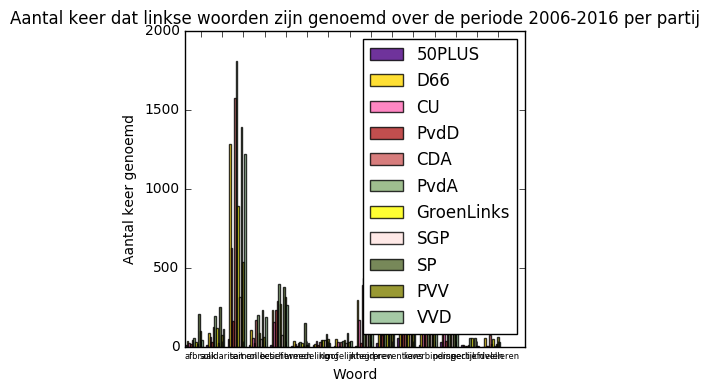

In [5]:
import matplotlib.colors as colors

allColors = list(colors.cnames.keys())
allUsedLeftWords = getUsedWords(allLeftWords, used_words)
counts = calculateCountsParty(parties, allUsedLeftWords)
makeGraph(allUsedLeftWords, counts, allColors, list(parties.keys()), 'linkse', 'per partij')

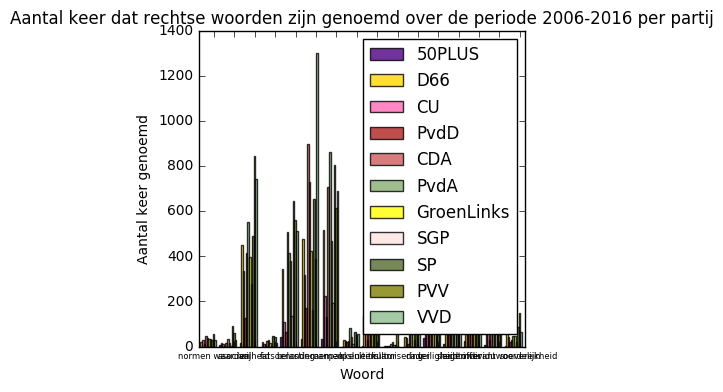

In [12]:
allUsedRightWords = getUsedWords(allRightWords, used_words)
counts = calculateCountsParty(parties, allUsedRightWords)
makeGraph(allUsedRightWords, counts, allColors, list(parties.keys()), 'rechtse', 'per partij')

In [6]:
# Een lijst van favoriete woorden per partij: het ‘CDA-woord’, het ‘D66-woord’ etc.
top_words_per_party = {}
number_of_top_words = 3
for party in parties.keys():
    top_words_per_party[party] = sorted(parties[party].iteritems(), 
                                        key=operator.itemgetter(1), reverse=True)[0:number_of_top_words]
    
print(top_words_per_party)

{'PvdD': [('kans', 243), ('beschermen', 230), ('ondernemen', 171)], 'VVD': [('ondernemen', 1303), ('samen', 1222), ('kans', 1129)], 'CDA': [('samen', 1572), ('kans', 1123), ('ondernemen', 897)], 'PvdA': [('samen', 1806), ('kans', 1468), ('veiligheid', 955)], 'GroenLinks': [('kans', 903), ('samen', 887), ('veiligheid', 516)], 'SGP': [('samen', 313), ('kans', 309), ('vrijheid', 277)], 'SP': [('samen', 1388), ('kans', 1041), ('veiligheid', 955)], 'PVV': [('vrijheid', 843), ('veiligheid', 663), ('kans', 661)], '50PLUS': [('kans', 54), ('samen', 46), ('belasting', 42)], 'D66': [('samen', 1282), ('kans', 1209), ('veiligheid', 707)], 'CU': [('samen', 624), ('kans', 530), ('veiligheid', 440)]}


In [9]:
import pandas as pd

df = pd.DataFrame.from_dict(top_words_per_party, orient='index')
df.columns = ['#1', '#2', '#3']

df.to_csv('list1.csv')


In [10]:
# 4 Groups: Sociaal-economisch links, Sociaal-economisch rechts, Sociaal-cultureel links, Sociaal-cultureel rechts

# TODO: PVV, zowel links als rechts??
eco_links_parties = ['SP', 'GroenLinks', 'PvdA', 'PVV', 'CU', 'PvdD'] 
eco_rechts_parties = ['PVV', 'VVD', 'CDA', 'SGP', '50PLUS']
cult_links_parties = ['SP', 'GroenLinks', 'PvdA', 'PvdD', 'D66']
cult_rechts_parties = ['PVV', 'CU', 'VVD', 'CDA', 'SGP', '50PLUS']

eco_links = {}
eco_rechts = {}
cult_links = {}
cult_rechts = {}

for party in parties:
    for word in parties[party]:
        if party in eco_links_parties:
            if word in eco_links:
                eco_links[word] += parties[party][word]
            else:
                eco_links[word] = parties[party][word]
        if party in eco_rechts_parties:
            if word in eco_rechts:
                eco_rechts[word] += parties[party][word]
            else:
                eco_rechts[word] = parties[party][word]
        if party in cult_links_parties:
            if word in cult_links:
                cult_links[word] += parties[party][word]
            else:
                cult_links[word] = parties[party][word]
        if party in cult_rechts_parties:
            if word in cult_rechts:
                cult_rechts[word] += parties[party][word]
            else:
                cult_rechts[word] = parties[party][word]

groups_dict = {'eco_links': eco_links, 'eco_rechts': eco_rechts, 'cult_links': cult_links, 'cult_rechts': cult_rechts}
groups_dict

{'cult_links': {'aanpakken': 2783,
  'achter slot en grendel': 16,
  'afbraak': 327,
  'amerikaanse toestanden': 14,
  'asociaal': 158,
  'belasting': 1844,
  'beschermen': 1505,
  'collectief': 646,
  'dader': 358,
  'eerlijk delen': 174,
  'eigen verantwoordelijkheid': 456,
  'fatsoen': 111,
  'gelijkheid': 102,
  'individu': 2147,
  'integreren': 1503,
  'islamisering': 38,
  'kans': 4864,
  'kleine overheid': 11,
  'kloof': 184,
  'leitkultur': 501,
  'neoliberalisme': 199,
  'nivelleren': 140,
  'normen waarden': 126,
  'ondernemen': 2454,
  'ongelijkheid': 210,
  'opsluiten': 239,
  'perspectief': 1186,
  'potverteren': 14,
  'preventie': 1105,
  'samen': 5526,
  'slachtoffer': 1324,
  'sociaal': 9,
  'soeverein': 264,
  'solidariteit': 678,
  'tweedeling': 235,
  'veiligheid': 3290,
  'verbinding': 1359,
  'verheffen': 84,
  'vrijheid': 2010},
 'cult_rechts': {'aanpakken': 2461,
  'achter slot en grendel': 24,
  'afbraak': 227,
  'amerikaanse toestanden': 8,
  'asociaal': 122,
 

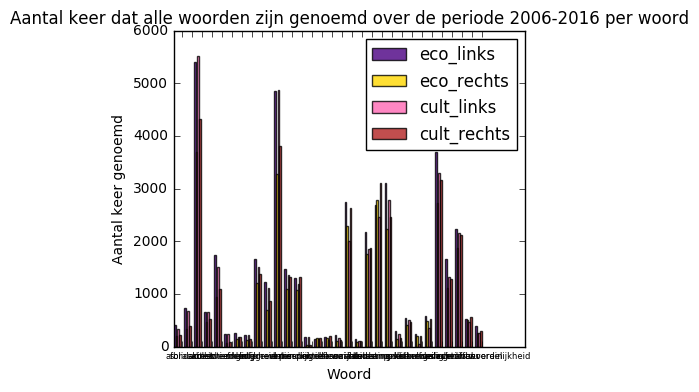

In [13]:
counts = calculateCountsParty(groups_dict, allUsedLeftWords+allUsedRightWords)
makeGraph(allUsedLeftWords+allUsedRightWords, counts, allColors, list(groups_dict.keys()), 'alle', 'per woord')